Welcome to the tutorial on how to use **Persistent Homology Convolutions**!

To begin, dowload the PHC module from GitHub as explained in the READ.me.       
The setup is simple and only requires importing two functions.

In [14]:
from PHC import PHC, preprocess
import gudhi as gd

In [15]:
import numpy as np #to load dataset
import matplotlib.pyplot as plt #visualization purposes
histo_imgs = np.load("grey_ost_img/image_data.npy", allow_pickle=True)
test_sample = histo_imgs[0]

Here's a visual on an image from the publically avaliable Ost. Data as used in our paper. It is important to note that the PHC functions can only handle **greyscaled images!** Be sure to make check your image arrays are either two dimensional or that it has depth one.

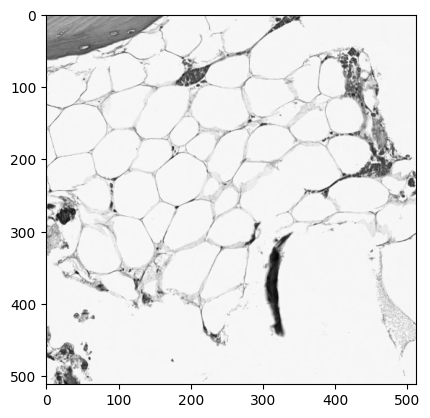

In [16]:
plt.imshow(test_sample, cmap="gray")
plt.show()

The functions below condition the greyscaled images to ensure that the localized topological features that are extracted are robust and do not include large amounts of noise. Feel free to use other methods to condition your images as you see fit for your experiments. 

In [17]:
# initialize processing parameters, fix kernel size to default
conditioning = preprocess(thresh=230, iterate=2) 
thresh_img = conditioning.threshold(test_sample)
prepped_image = conditioning.dilate(thresh_img) 

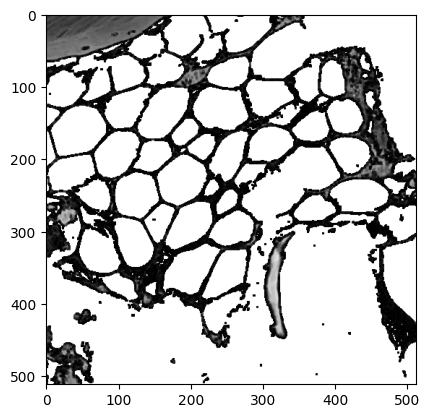

In [18]:
plt.imshow(256-prepped_image, cmap='gray')
plt.show()

In [20]:
localhom = PHC(persistence_type="cubical", stride=128, window_size=128) #larger window size since image consists of fat cells
data = localhom.convolve(prepped_image) #lowerstar filtration on cubical complex
np.shape(data) #output dimension of each PI is resolution_size^2

(16, 400)

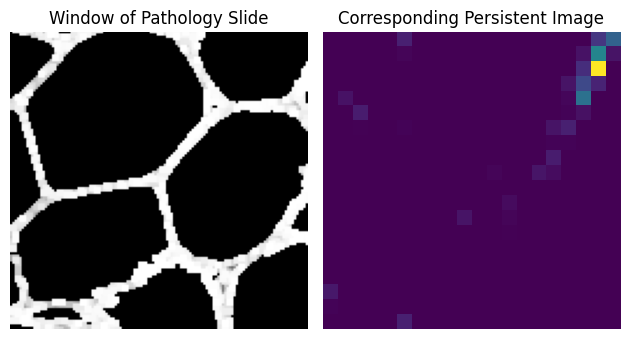

In [26]:
data = np.array(data).reshape((16,20,20)) #can be easily reformated using numpy function

# Create a figure and a set of subplots with 1 row and 2 columns
fig, axes = plt.subplots(1, 2) 

axes[0].imshow(prepped_image[128:256, :128], cmap="gray")
axes[0].set_title('Window of Pathology Slide')
axes[0].axis('off')

axes[1].imshow(data[1])
axes[1].set_title('Corresponding Persistent Image')
axes[1].axis('off') 

plt.tight_layout()
plt.show()

Tada!